In [ ]:
import numpy as np                  #Import Numpy
import skfuzzy as fuzz              #Import Sci-kit Fuzzy
from skfuzzy import control as ctrl #Import control from Sci-kit Fuzzy
import matplotlib.pyplot as plt

universie_variable = np.arange(11)
mfx = fuzz.trapmf(universie_variable, [0, 5, 10,10])

In [ ]:
speed = ctrl.Antecedent(np.arange(0, 100, 1), 'speed')
distance = ctrl.Antecedent(np.arange(0, 10, 1), 'distance')
#weight = ctrl.Antecedent(np.arange(0, 3000, 1), 'weight')
#road_condition = ctrl.Antecedent(np.arange(0, 10, 1), 'road_condition')

brakes = ctrl.Consequent(np.arange(0, 50, 1), 'brakes')

In [ ]:
speed['slow'] = fuzz.trapmf(speed.universe, [0,0,20,30])
speed['average'] = fuzz.trapmf(speed.universe, [25, 45, 55, 60])
speed['fast'] = fuzz.trapmf(speed.universe, [50, 80, 100, 100])

distance['far'] = fuzz.trapmf(distance.universe, [0,0,2,3])
distance['equidistant'] = fuzz.trapmf(distance.universe, [2,4,5,6])
distance['close'] = fuzz.trapmf(distance.universe, [5, 8, 9, 10])

weight['light'] = fuzz.trapmf(weight.universe, [0,0,1000,1200])
weight['midweight'] = fuzz.trapmf(weight.universe, [1000,1500,1700,2000])
weight['heavy'] = fuzz.trapmf(weight.universe, [1700, 2400, 2700, 3000])

#road_condition['bad'] = fuzz.trapmf(road_condition.universe, [0,0,1,2])
#road_condition['normal'] = fuzz.trapmf(road_condition.universe, [1,3,4,5])
#road_condition['good'] = fuzz.trapmf(road_condition.universe, [3,7,8,10])

brakes['soft'] = fuzz.trapmf(brakes.universe, [0,5,10,15])
brakes['standard'] = fuzz.trapmf(brakes.universe, [10,20,25,30])
brakes['strong'] = fuzz.trapmf(brakes.universe, [25,35,40,50])

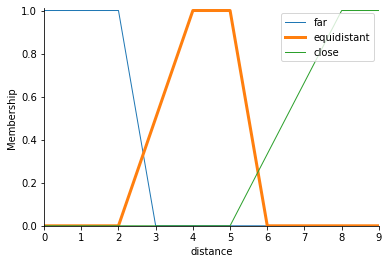

In [ ]:
distance['equidistant'].view()
plt.legend(loc="upper right")

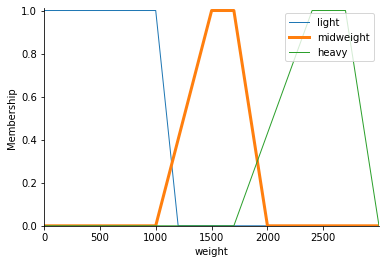

In [ ]:
weight['midweight'].view()
plt.legend(loc="upper right")

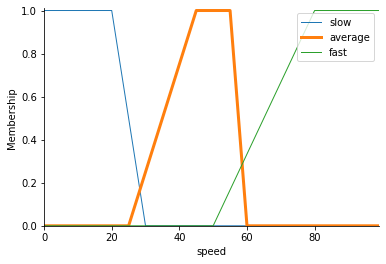

In [ ]:
speed['average'].view()
plt.legend(loc="upper right")

In [ ]:
#road_condition['normal'].view()
#plt.legend(loc="upper right")

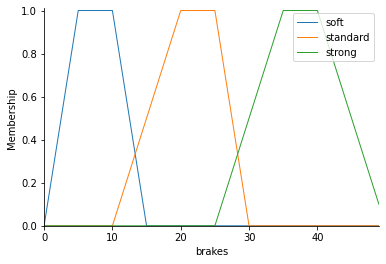

In [ ]:
brakes.view()
plt.legend(loc="upper right")

In [125]:
#Defining Rules

rule1 = ctrl.Rule(distance['far']  & speed['slow']  , brakes['soft'])
rule2 = ctrl.Rule(distance['far'] & speed['average'] , brakes['standard'])
rule3 = ctrl.Rule(distance['far']  & speed['fast'] , brakes['strong'])
rule4 = ctrl.Rule(distance['equidistant']  & speed['slow'] , brakes['soft'])
rule5 = ctrl.Rule(distance['equidistant']  & speed['average'] , brakes['standard'])
rule6 = ctrl.Rule(distance['equidistant'] & speed['fast'] , brakes['standard'])
rule7 = ctrl.Rule(distance['close']  & speed['slow'] , brakes['soft'])
rule8 = ctrl.Rule(distance['close'] & speed['average'] , brakes['standard'])
rule9 = ctrl.Rule(distance['close'] & speed['fast'] , brakes['strong'])

In [ ]:
braking_ctrl = ctrl.ControlSystem([rule1, rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
braking = ctrl.ControlSystemSimulation(braking_ctrl)

7.5


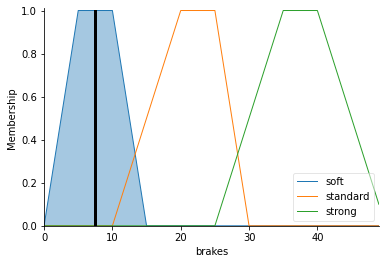

In [124]:
braking.input['distance'] = 2
braking.input['speed'] = 20

defuzz_centroid = fuzz.defuzz(universie_variable, mfx, 'mom') 

braking.compute()
print(braking.output['brakes'])
brakes.view(sim=braking)

7.5


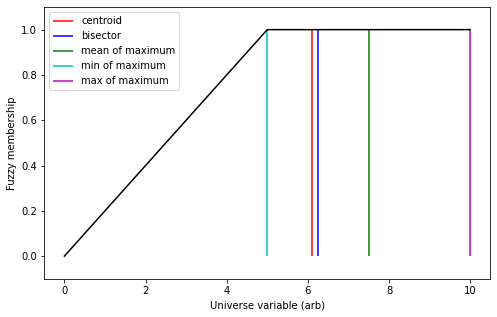

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(universie_variable, mfx, 'centroid')  # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(universie_variable, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(universie_variable, mfx, 'mom')
defuzz_som = fuzz.defuzz(universie_variable, mfx, 'som')
defuzz_lom = fuzz.defuzz(universie_variable, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroid', 
          'bisector', 
          'mean of maximum', 
          'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(universie_variable, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(universie_variable, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

print(braking.output['brakes'])
braking.compute()
plt.show()
